<a href="https://colab.research.google.com/github/DButmeh/-Sales-Prediction-Project/blob/main/Project_1_Part_2_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1 - Part 2 (Core)
### **Dina AlBotmeh**
---------------------

#The **goal** of  the **Project**  is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

In [71]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style="ticks", color_codes=True)
from types import FrameType
from pickle import FRAME
from typing import Pattern
pd.set_option('display.max_columns',100)

In [73]:
# Read in the data with Pandas
fpath = "/content/drive/MyDrive/CodingDojo/ project sales predictions/sales_predictions_2023cl.csv"
df=pd.read_csv(fpath)
# Display the first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploring data depending on quantitative and qualitative analysis:
 - Item_Outlet_Sales is the key of quantitative analysis
 - Outlet_Type is the key of qualitative analysis

In [74]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


- ITem_MRP....small difference between the mean and meadin values
- Item_Outlet_Sales  the differenc between the mean the meadin value is a bit larger than Item_MRP
- Min and Max value at Item Outlet Sales is lager
----------------------------------------


In [75]:
col_num=df.select_dtypes("number").columns
col_num

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [76]:
# Get correlations Panda's correlation method
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.03,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


##Starting with Heatmap to view the correlation between quantitative features

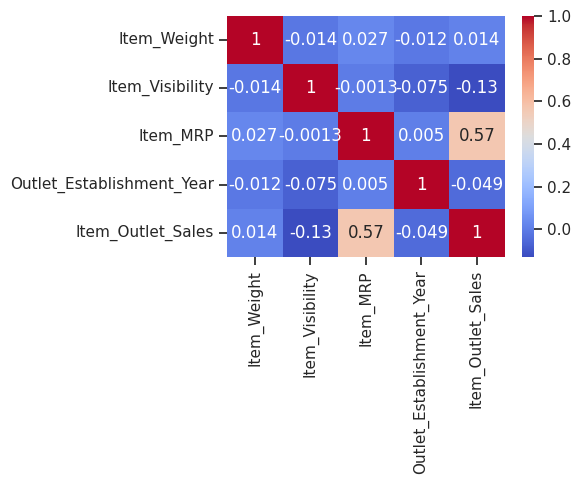

In [77]:
# Create a Heatmap
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax=ax);
fig.tight_layout()
fig.savefig('SavedPlot.png', dpi = 300)

 ## Only one **posetive correlations** =0.57 between **Item_Outlet_Sales** vs.**Item_MRP**  "moderate."
 ------

## Based on *correlations* reusult  we ll Explore(Item_Outlet_Sales) by Item_MRP vs Item_Type

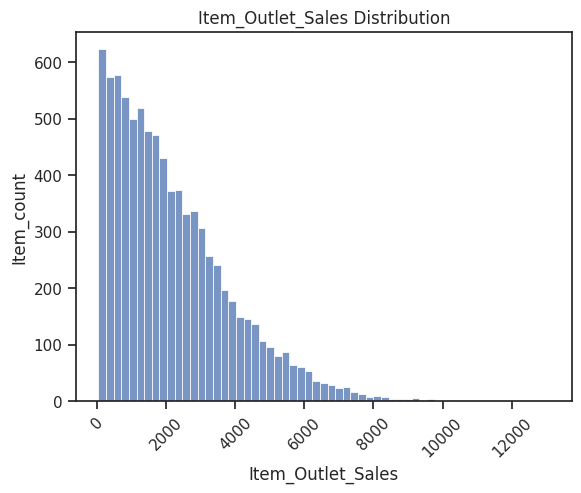

In [78]:
# Use seaborn's histplot explore Item_MRP
ax =sns.histplot(data=df, x="Item_Outlet_Sales")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45)
ax.set_title('Item_Outlet_Sales Distribution')
ax.set_ylabel('Item_count')
ax.set_xlabel('Item_Outlet_Sales');
fig.tight_layout()
fig.savefig('SavedPlot.png', dpi = 300)

## Less price more Item sales

---------------



#Exploring **Item_MRP**















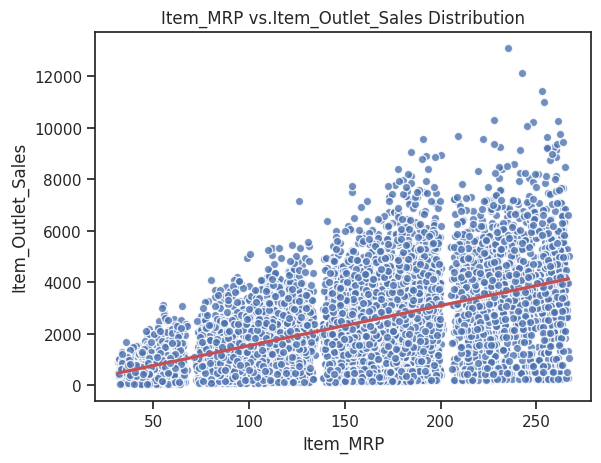

In [79]:
# Saving the arguments for the markers' edge color in a dict to to use as scatter_kws
scatter_kws = dict(edgecolor='white')
line_kws = dict(color='r')
ax = sns.regplot(data=df, x="Item_MRP", y="Item_Outlet_Sales",line_kws= line_kws, scatter_kws=scatter_kws);
ax.set(title= 'Item_MRP vs.Item_Outlet_Sales Distribution');
fig.tight_layout()
fig.savefig('SavedPlot.png', dpi = 300)

##There are four ranges for the **Item_MRP** distribution over Item out sales
## Exploring Item count distribution over these four ranges by hitogram



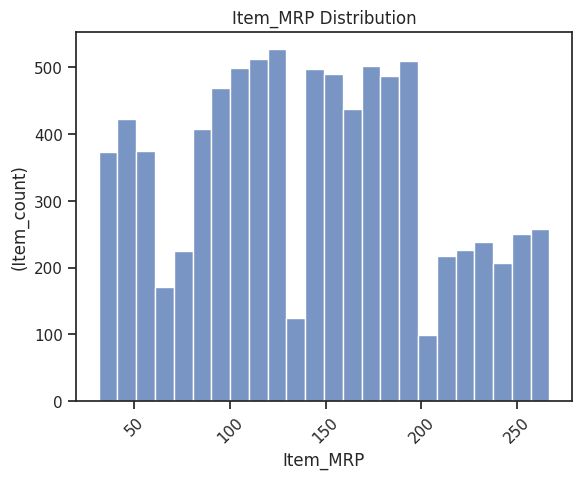

In [80]:
from pathlib import WindowsPath
# Use seaborn's histplot explore Item_MRP
ax =sns.histplot(data=df, x="Item_MRP",binwidth=10)
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45,)
ax.set_title('Item_MRP Distribution')
ax.set_ylabel('(Item_count)')
ax.set_xlabel('Item_MRP');
fig.tight_layout()
fig.savefig('SavedPlot.png', dpi = 300)

# **The highest sales are at the two middle ranges of Item_MRP**
--------------------------------------------------

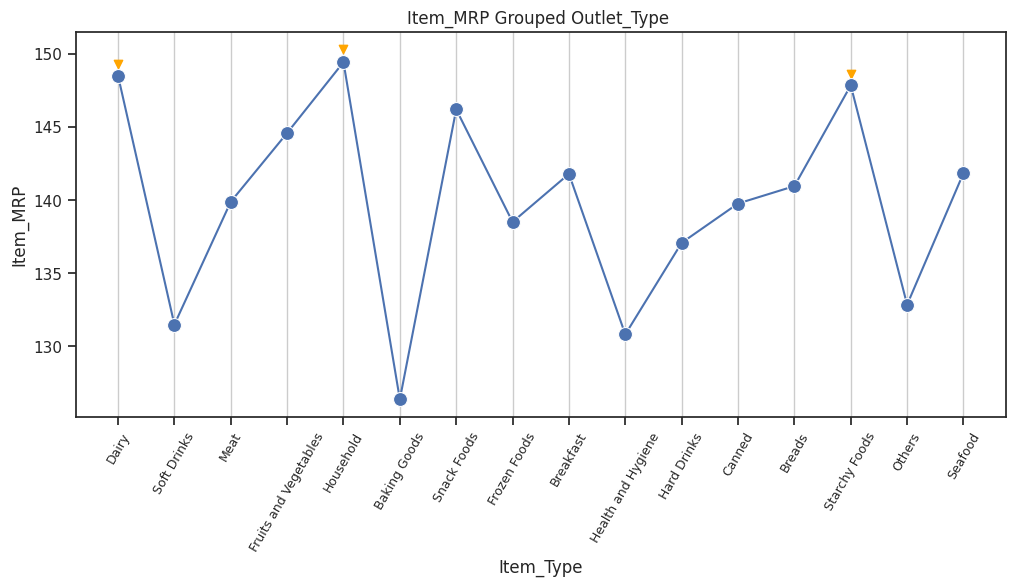

In [81]:
# barplot of Item_Outlet_Sales vs.Outlet_Identifier
plt.figure(figsize=(12, 5))
ax= sns.lineplot(data=df,x="Item_Type",y="Item_MRP",errorbar=None,c ='b', marker = 'o', markersize = 10);
ax.set(title="Item_MRP Grouped Outlet_Type ");
ax.tick_params("x", labelrotation=60,labelsize= 9)
ax.grid(axis = 'x');

x=['Dairy','Household','Starchy Foods']
y=[149.3,150.3, 148.6]
# using a point '.' marker
plt.scatter(x,y, marker ='v',c="orange")
plt.show()
fig.tight_layout()
fig.savefig('SavedPlot.png', dpi = 300)

###- Dairy,Household and Starchy Foods score the hightest Item_MRP
###- Soft Drinks ,Baking Goods,Health & Hygiene ,and Ohters score the lowest Item_MRP  
###- The rest of Outlet_Types  are on  the moderate  range of Item_MRP
---------------------

## Explore revenue of Item_Type

<ipython-input-82-d4e162c4617d>:22: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


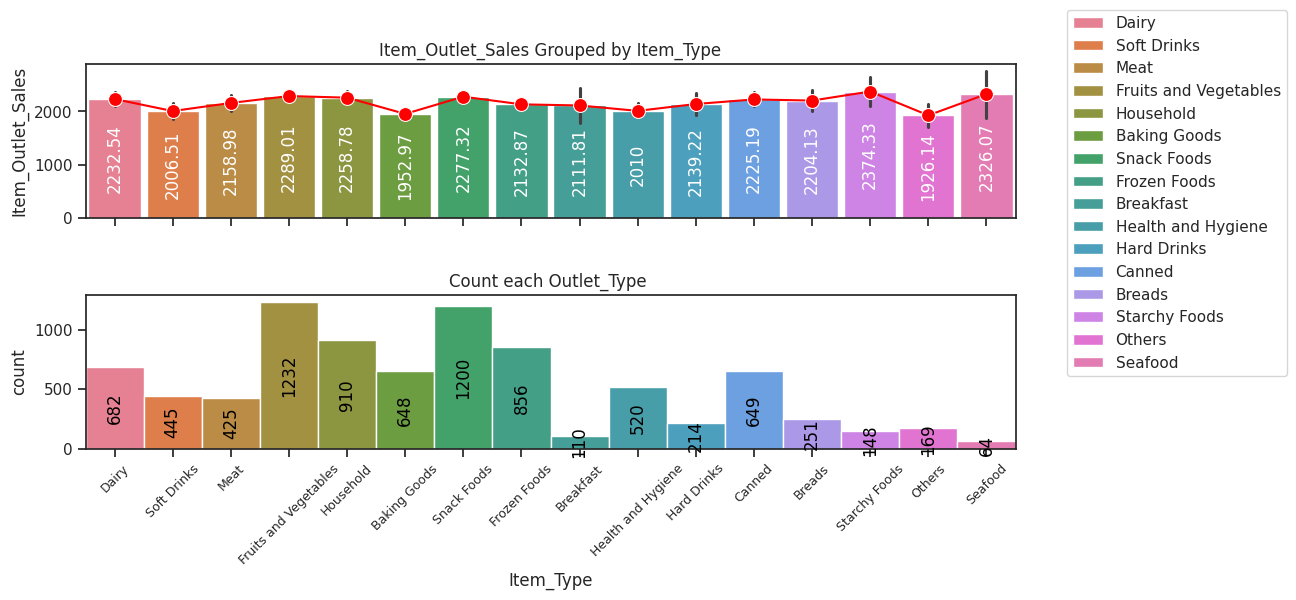

In [82]:
# Create a figure with two subplots sharing the x-axis
fig, axs = plt.subplots(2, 1, figsize=(12, 5), sharex=True)

# Plot the bar plot on the first subplot
sns.barplot(data=df, x="Item_Type", y='Item_Outlet_Sales', hue="Item_Type", width=0.9, ax=axs[0])
axs[0].set_title("Item_Outlet_Sales Grouped by Item_Type")
axs[0].tick_params("x", labelrotation=0, labelsize=-1)
for container in axs[0].containers:
    axs[0].bar_label(container, label_type='center', rotation=90, color='white')

# Plot the line plot on the second subplot
sns.lineplot(data=df, x="Item_Type", y="Item_Outlet_Sales", errorbar=None, c='red', marker='o', markersize=10, ax=axs[0])
sns.countplot(data=df,x="Item_Type",hue="Item_Type",legend="full",width=1, ax=axs[1]);
axs[1].set(title="Count each Outlet_Type ");
axs[1].tick_params("x", labelrotation=45,labelsize= 9)
for container in axs[1].containers:
    axs[1].bar_label(container ,label_type='center', rotation=90, color='black')
axs[1].legend(bbox_to_anchor=(1.3,2.9));
# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.tight_layout()
fig.savefig('SavedPlot.png', dpi = 300)
# Show the plot
plt.show()

## -The high quantity of sales of Fruits & vegetables, household, Snack foods resulted in high Item OUtlet Sales.

## -For the rest of Item Types, explore the item MRP.To explor
 - Starchy food  and seafood score the highest Item outlet sales vs.  low quantity

<ipython-input-83-548a4e08cc2d>:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


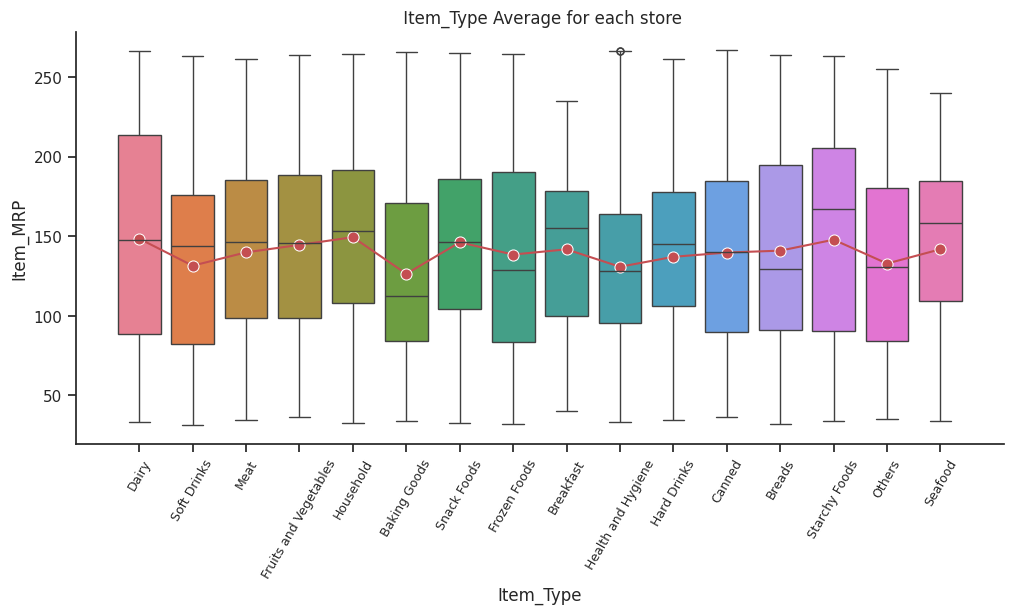

In [83]:
# Using catplot to make a boxplot, adding dodge=False to reduce white space
g=sns.catplot(data=df, x='Item_Type', y='Item_MRP',hue='Item_Type',kind='box', dodge=False,aspect=13/6.3,width=0.8)
g.ax.set(title=" Item_Type Average for each store");
g.ax.tick_params("x", labelrotation=60,labelsize= 9)
ax= sns.lineplot(data=df,x="Item_Type",y="Item_MRP",errorbar=None,c ='r', marker = 'o', markersize = 8);

fig.tight_layout()
fig.savefig('SavedPlot.png', dpi = 300)


# Through exploring the median values for Item MRP for each item type, we notice that Item MRP for **Seafood** and **starchy foods** have highest median (Prices) which explains the high OUtlet Item Sales.
#  **Dairy** with the highest range and equale distrbution
# **Seafood , Hard drinks** and **Household** are with in the highest min  Item_MPR(Price) range
-----
---------------

# **Qualitative analysis**

### Exploring Item_Fat_Content on Item Types

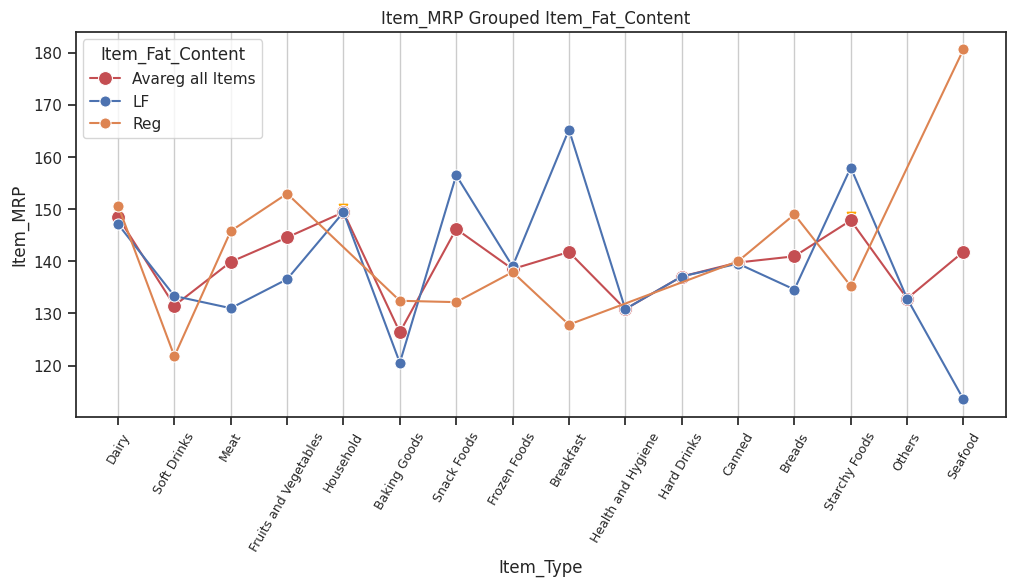

<ipython-input-100-97895b1cbfbf>:13: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


In [100]:
# linelot of Item_Outlet_Sales vs.Outlet_Identifier
plt.figure(figsize=(12, 5))
ax= sns.lineplot(data=df,x="Item_Type",y="Item_MRP",errorbar=None,c ='r', marker = 'o', markersize = 10, label="Avareg all Items");
ax= sns.lineplot(data=df,x="Item_Type",y="Item_MRP",errorbar=None,c ='b', marker = 'o', markersize = 8,hue=	"Item_Fat_Content");
ax.set(title="Item_MRP Grouped Item_Fat_Content  ");
ax.tick_params("x", labelrotation=60,labelsize= 9)
ax.grid(axis = 'x');
x=['Dairy','Household','Starchy Foods']
y=[149.3,150.3, 148.6]
# using a point '.' marker
plt.scatter(x,y, marker ='v',c="orange")
plt.show()
fig.tight_layout()
fig.savefig('SavedPlot.png', dpi = 300)

##For starchy foods, breakfast and snacks, the low fat items raised the Item MRP which led to a rise in Item Outlet Sales

#Explor "Outlet_Identifier" to fined stores  with the highest Outlet_Sales

In [85]:
#use index to order Outlet_Identifier
storID=df["Outlet_Identifier"].value_counts().index
storID

Index(['OUT027', 'OUT013', 'OUT049', 'OUT046', 'OUT035', 'OUT045', 'OUT018',
       'OUT017', 'OUT010', 'OUT019'],
      dtype='object', name='Outlet_Identifier')

## **Out027** store achived highest Sales of the product
------

<ipython-input-103-8a58e27a0d3f>:8: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


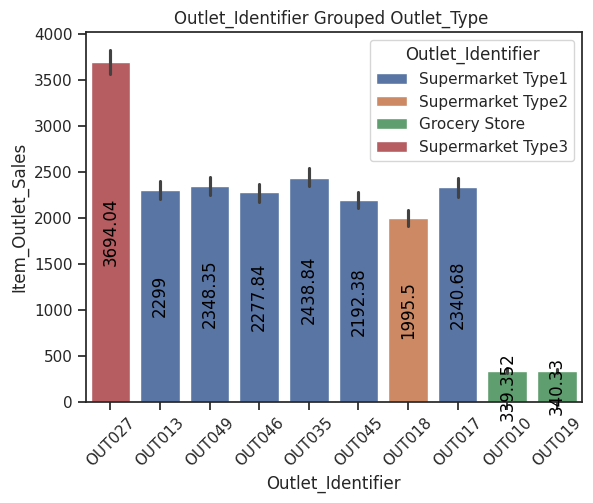

In [103]:
# barplot of Item_Outlet_Sales vs.Outlet_Identifier
ax=sns.barplot(data=df,x="Outlet_Identifier",y="Item_Outlet_Sales",hue="Outlet_Type",legend="full",order=storID);
ax.set(title="Outlet_Identifier Grouped Outlet_Type ");
ax.tick_params("x", labelrotation=45)
for container in ax.containers:
    ax.bar_label(container ,label_type='center', rotation=90, color='black')
ax.legend(title="Outlet_Identifier", bbox_to_anchor=(1,1));
fig.tight_layout()
fig.savefig('SavedPlot.png', dpi = 300)

## **Out027** (supermarket type 3) store achieved the highest Sales -**Item_Outlet_Sales**-Then:
 - Supermarket type 1
 - Supermarket type 2
 - Grocery store


<ipython-input-87-ed7f9f3244e2>:5: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


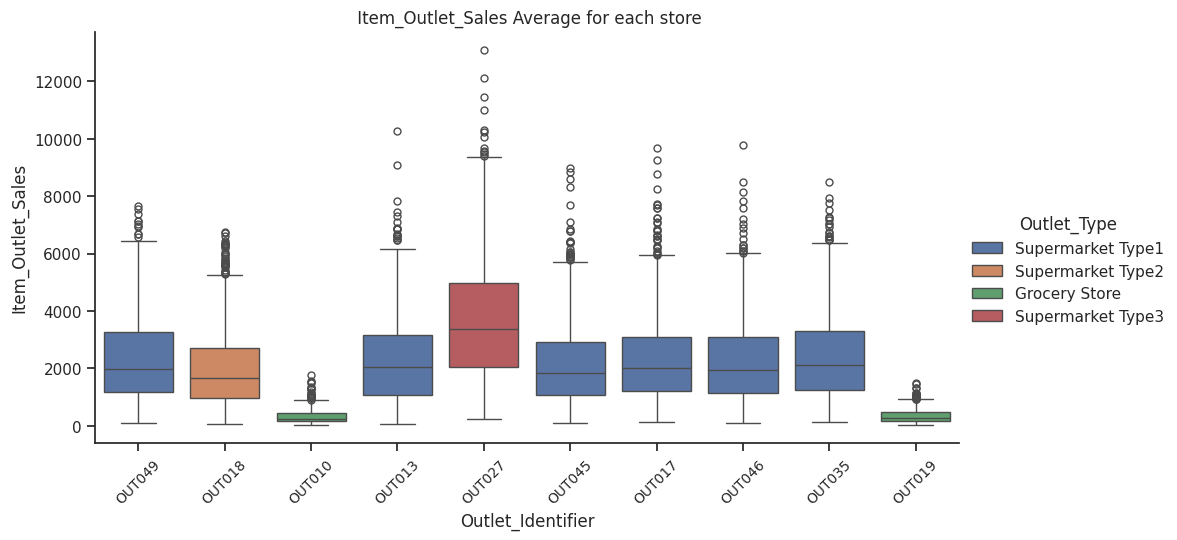

In [87]:
	# Using catplot to make a boxplot, adding dodge=False to reduce white space
g=sns.catplot(data=df, x='Outlet_Identifier', y='Item_Outlet_Sales',hue='Outlet_Type',kind='box', dodge=False,aspect=8/4)
g.ax.set(title=" Item_Outlet_Sales Average for each store");
g.ax.tick_params("x", labelrotation=45,labelsize= 10)
fig.tight_layout()
fig.savefig('SavedPlot.png', dpi = 300)

#50% of the products in Supermarket type 3 achieved the highest Itemm Outlet Sales than the rest of the Outlet types.

###Exploring Item_Type vs Outlet_Identifier

<ipython-input-88-9cb39d86bd43>:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


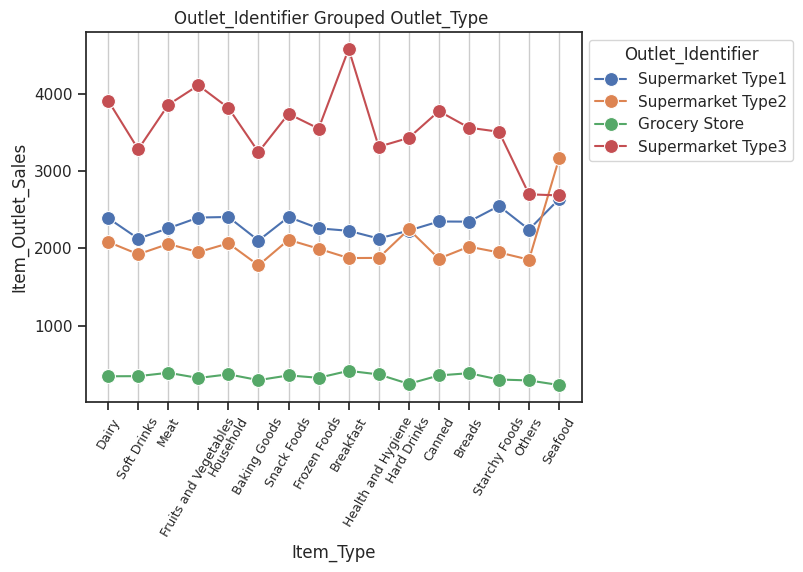

In [88]:
# lineplot of Item_Outlet_Sales vs.Outlet_Identifier
ax=sns.lineplot(data=df,x="Item_Type",y="Item_Outlet_Sales",hue="Outlet_Type",errorbar=None,c ='red', marker = 'o', markersize = 10);
ax.set(title="Outlet_Identifier Grouped Outlet_Type ");
ax.tick_params("x", labelrotation=60,labelsize= 9);
ax.legend(title="Outlet_Identifier", bbox_to_anchor=(1,1));
ax.grid(axis = 'x');
fig.tight_layout()
fig.savefig('SavedPlot.png', dpi = 300)

#The pattern of Item Outlet Sales in supermarket type 3 is higher in breakfast and fruits and vegetables compared to the rest of the supermarket patterns.
# Supermarket type 2 has a higher pattern for seafood and hard drinks.
#  This resutled in a different pattern of Item Outlet Sales for these two supermarkets.  

## explor m Outlet Sales in supermarket type 3 is higher in breakfast and fruits and vegetables

In [89]:
Supermarket_Type3 =df['Outlet_Type'].str.contains("Supermarket Type3")
store3=df.loc[Supermarket_Type3]
store3["Item_Fat_Content"].value_counts()

,count
Item_Fat_Content,
LF,605
Reg,330


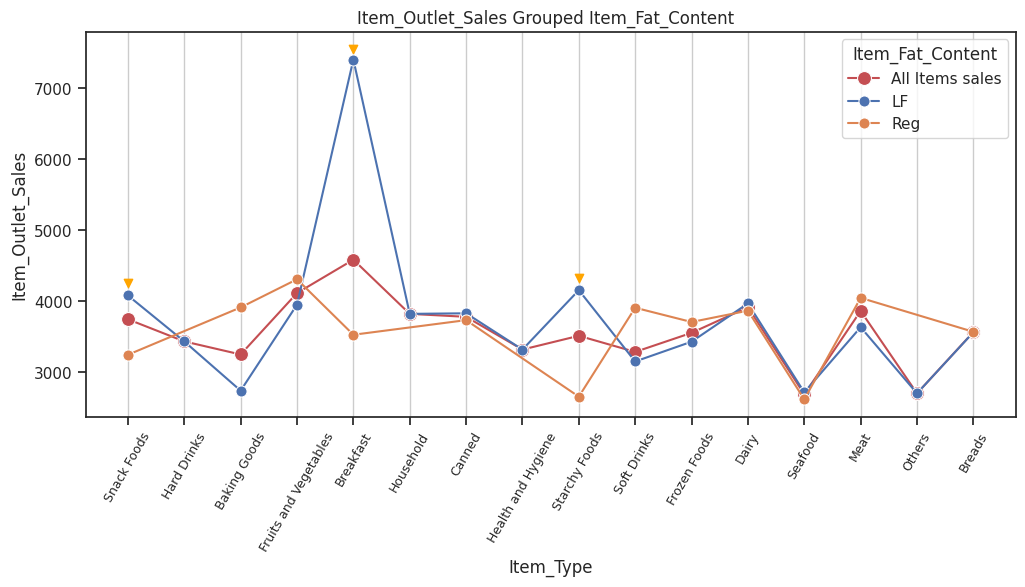

<ipython-input-99-50895c2023e1>:15: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


In [99]:

# lineplot of Item_Outlet_Sales vs.Outlet_Identifier
plt.figure(figsize= (12, 5))
ax= sns.lineplot(data=store3,x="Item_Type",y="Item_Outlet_Sales",errorbar=None,c ='r', marker = 'o', markersize = 10,label="All Items sales");
ax.tick_params("x", labelrotation=60,labelsize= 9)

ax= sns.lineplot(data=store3,x="Item_Type",y="Item_Outlet_Sales",errorbar=None,c ='b', marker = 'o', markersize = 8,hue="Item_Fat_Content");
ax.set(title="Item_Outlet_Sales Grouped Item_Fat_Content  ");
ax.tick_params("x", labelrotation=60,labelsize= 9)
ax.grid(axis = 'x');
x=['Snack Foods','Breakfast','Starchy Foods']
y=[4250,7550,4320]
# using a point '.' marker
plt.scatter(x,y, marker ='v',c="orange")
plt.show()
fig.tight_layout()
fig.savefig('SavedPlot.png', dpi = 300)

# The low fat  breakfast type is the reason for scoring the highest Item_Outlet_Sales
#  Snack foods and Starchy Foods also scored higher Item_Outlet_Sales by the effect of low fat type

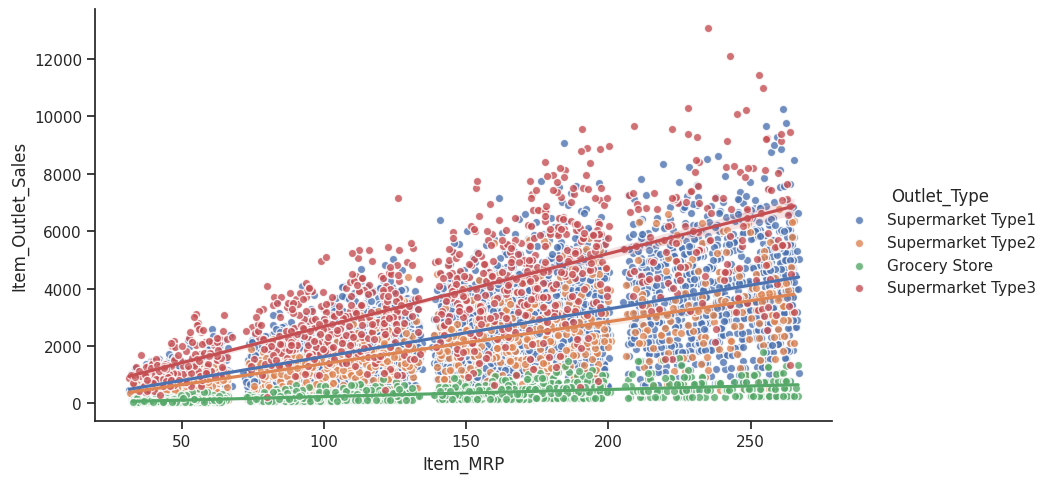

In [ ]:
g = sns.lmplot(data=df, x="Item_MRP", y="Item_Outlet_Sales",
               scatter_kws=scatter_kws,
                hue="Outlet_Type",aspect=7/4);
fig.tight_layout()
fig.savefig('SavedPlot.png', dpi = 300)

#Through exploring slopes, most Supermarket type 3's Item types are located in the 2nd and 3rd Item MRP ranges.
# Distribution of Item types around the Supermarket type1 trend line seems like the average of the all the item outlet sales.

In [ ]:
def plot_numeric(df,col,col2,col3):
  """EDA function to plot a barplot,countplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,7), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.barplot(data=df,x = col,y= col2 ,hue= col3,ax = axes[0])
  axes[0].set(title= (({col2},"Grouped",{col3}) ))
  for container in axes[0].containers:
     axes[0].bar_label(container ,label_type='center', rotation=90, color='white')


  sns.countplot(data= df,x= col,hue=col3,legend="full",ax =axes[1]);

  for container in axes[1].containers:
     axes[1].bar_label(container ,label_type='center', rotation=90, color='white')
  axes[1].tick_params("x", labelrotation=45,labelsize= 9)
  ## Updating title of top graph
  axes[1].legend(title="Item_Type", bbox_to_anchor=(1,1));
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

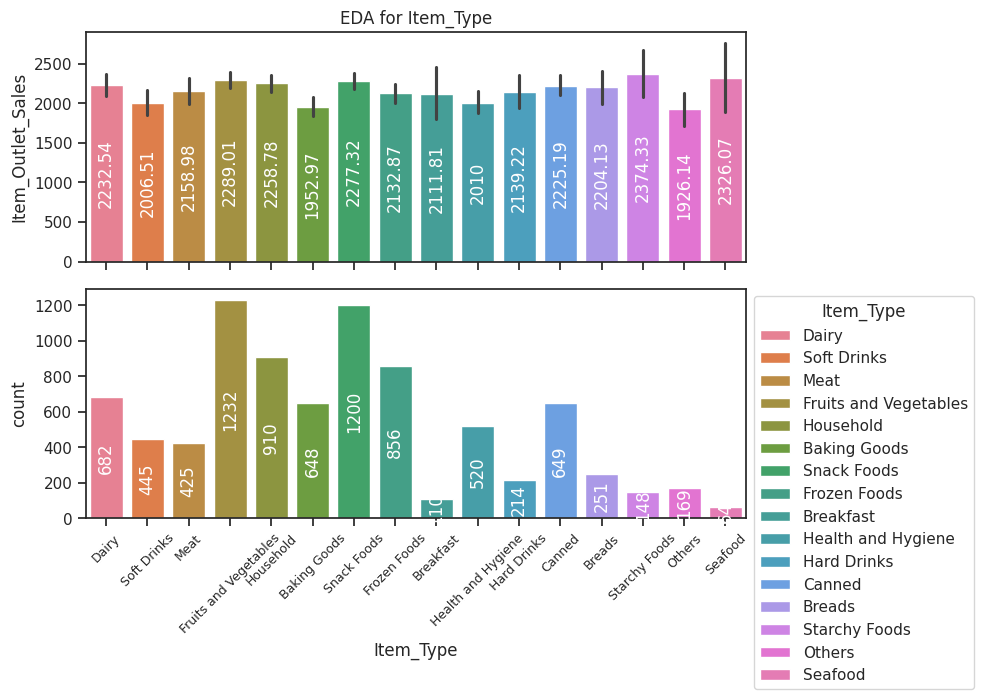

In [ ]:
plot_numeric(df,"Item_Type",'Item_Outlet_Sales',"Item_Type")